# Import Library

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

from datetime import datetime as dt
import math


# Load Data

In [2]:
data = pd.read_csv('PSHRIUSDM.csv')
data['DATE'] = pd.to_datetime(data['DATE'])

data.rename(columns={'DATE': 'Periode', 'PSHRIUSDM': 'Harga'}, inplace=True)

data.tail()

,Periode,Harga
445,2017-02-01,12.12541
446,2017-03-01,12.12541
447,2017-04-01,12.12541
448,2017-05-01,12.12541
449,2017-06-01,12.12541


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Periode  450 non-null    datetime64[ns]
 1   Harga    450 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.2 KB


# Permasalahan yang Harus Diselesaikan

Case 1: saya mau tahu berapa rata-rata harga udang selama tahun 2001 <br>
Case 2: saya mau tahu berapa harga udang tertinggi dan terendah pada semester awal 2010 <br>
Case 3: saya mau tahu trend harga udang dunia dari awal sampai akhir per bulannya <br>
Case 4: saya mau tahu tahun berapa terjadinya kenaikan dan penurunan harga paling drastis berdasarkan data rata-rata setiap tahun nya

# Input Form

In [4]:
# tanggal_awal = '2001-01-01'
# tanggal_akhir = '2010-12-31'
# satuan = 'bulan'

tanggal_awal = input('Masukkan Batas Tanggal Awal (yyyy-mm-dd): ')
tanggal_akhir = input('Masukkan Batas Tanggal Akhir (yyyy-mm-dd): ')
satuan = input('Masukkan Satuan Periode (bulan/tahun): ')

Masukkan Batas Tanggal Awal (yyyy-mm-dd): 2001-01-01
Masukkan Batas Tanggal Akhir (yyyy-mm-dd): 2010-12-31
Masukkan Satuan Periode (bulan/tahun): bulan


In [5]:
satuan = satuan.lower()

if satuan == 'bulan':
    form = 'M'
elif satuan == 'tahun':
    form = 'Y'

# Olah Data

In [6]:
ext_data = data[(data['Periode'] >= tanggal_awal) & (data['Periode'] <= tanggal_akhir)]
tertinggi = ext_data['Harga'].max()
terendah = ext_data['Harga'].min()
rata_rata = ext_data['Harga'].mean()
data['year'] = pd.DatetimeIndex(data['Periode']).year.astype(str)

In [7]:
group_data = ext_data.groupby(data['Periode'].dt.to_period(form)).agg({'Harga': 'mean'})
group_data.head()

,Harga
Periode,
2001-01,15.9468
2001-02,16.3142
2001-03,16.5347
2001-04,16.5347
2001-05,16.5347


# Plot Grafik

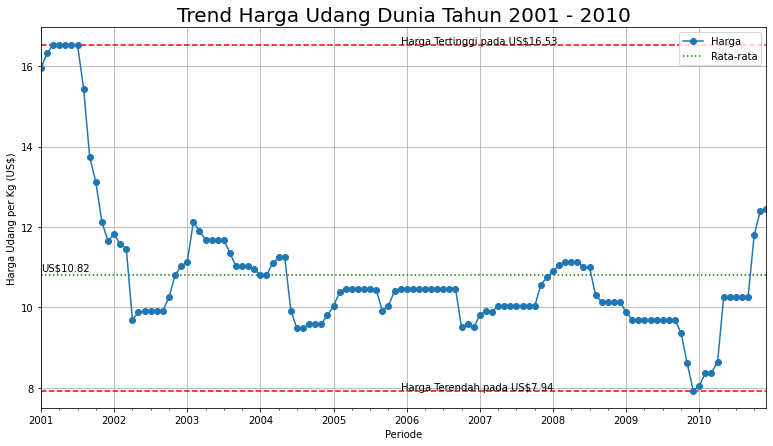

In [8]:
group_data.plot(marker='o', figsize=(13,7))

idx_min = group_data.index[0]
idx_max = group_data.index[-1]

idx_mid = group_data.index[len(group_data)//2 - 1]

plt.grid(True)

plt.hlines(tertinggi, idx_min, idx_max, colors='r', linestyle='--')
plt.hlines(terendah, idx_min, idx_max, colors='r', linestyle='--')
plt.hlines(rata_rata, idx_min, idx_max, colors='g', linestyle=':', label='Rata-rata')

plt.annotate('Harga Tertinggi pada US${}'.format(round(tertinggi, 2)), (idx_mid, tertinggi))
plt.annotate('Harga Terendah pada US${}'.format(round(terendah, 2)), (idx_mid, terendah))
plt.annotate('US${}'.format(round(rata_rata, 2)), (idx_min, rata_rata*1.01))

plt.title('Trend Harga Udang Dunia Tahun {} - {}'.format(tanggal_awal.split('-')[0], tanggal_akhir.split('-')[0]), fontsize=20)
plt.ylabel('Harga Udang per Kg (US$)')

plt.legend()
plt.show()

# Case 4 

In [9]:
group_data['th_2'] = group_data['Harga'].shift(+1).fillna(method='ffill')
group_data['Perubahan'] = group_data['Harga'] - group_data['th_2']
dt = group_data.reset_index(drop = False).sort_values('Perubahan', ascending = False)
dt

,Periode,Harga,th_2,Perubahan
112,2010-05,10.251483,8.653134,1.598349
117,2010-10,11.794717,10.251483,1.543234
25,2003-02,12.125410,11.133330,0.992080
118,2010-11,12.400987,11.794717,0.606270
22,2002-11,10.802600,10.251500,0.551100
...,...,...,...,...
7,2001-08,15.432300,16.534700,-1.102400
41,2004-06,9.920790,11.243562,-1.322772
8,2001-09,13.742100,15.432300,-1.690200
15,2002-04,9.700300,11.464000,-1.763700


In [10]:
th_max = dt['Periode'].astype(str).values[0]
harga_max = dt['Perubahan'].max()

th_min = dt['Periode'].astype(str).values[-2]
harga_min = dt['Perubahan'].min() * -1
kenaikan = "Kenaikan tertinggi terjadi pada tahun {} yang mengalami kenaikan sebesar {} dari tahun sebelumnya.". format(th_max, harga_max)
penurunan = "Penurunan tertinggi terjadi pada tahun {} yang mengalami penurunan sebesar {} dari tahun sebelumnya.". format(th_min, harga_min)
print(kenaikan,penurunan)

Kenaikan tertinggi terjadi pada tahun 2010-05 yang mengalami kenaikan sebesar 1.5983494999999994 dari tahun sebelumnya. Penurunan tertinggi terjadi pada tahun 2002-04 yang mengalami penurunan sebesar 1.7637 dari tahun sebelumnya.


[Text(0, 0.5, 'Harga Udang (US$)'),
 Text(0.5, 0, 'Periode'),
 Text(0.5, 1.0, 'Tred Harga Udang Dunia Tahun 1980 - 2017')]

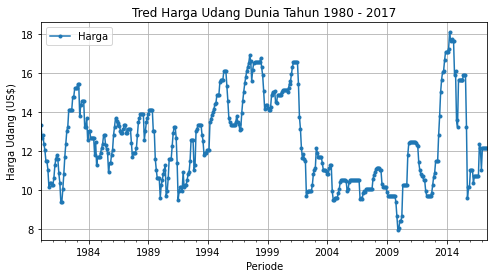

In [11]:
X = pd.to_datetime(data['Periode'])
Y = data['Harga']

df = pd.DataFrame({'date': X, 'Harga': Y})
ax = df.plot.line(x='date', y='Harga', rot=0, style=['.-'], figsize=(8, 4), grid=True)

ax.set(xlabel="Periode",
       ylabel="Harga Udang (US$)",
       title="Tred Harga Udang Dunia Tahun 1980 - 2017")


In [12]:
tahun = "2010"

In [13]:
data['year']= pd.DatetimeIndex(data['Periode']).year.astype(str)
data['month_year'] = pd.to_datetime(data['Periode']).dt.to_period('M')

case1 = data[data['year'] == tahun]['Harga'].mean()
case1

10.11369425

In [14]:
p = pd.date_range(tahun, freq='M', periods=6)
d = p.to_period()
data['month_year']
# month = d.astype(str).tolist()
# mask = (data['month_year'] >=month[1]) & (data['month_year'] <= month[5])
# semester1 = data.loc[mask]
# semester1

0      1980-01
1      1980-02
2      1980-03
3      1980-04
4      1980-05
        ...   
445    2017-02
446    2017-03
447    2017-04
448    2017-05
449    2017-06
Name: month_year, Length: 450, dtype: period[M]